# 1. Dataset ‚ÄúPump Sensor Data‚Äù (Kaggle ‚Äì bomba industrial)

Descripci√≥n:

Sensores instalados en una bomba industrial, con 53 canales (sensor_00 a sensor_52) medidos a lo largo de ~220‚ÄØk registros
timeeval.github.io
+2
medium.com
+2
github.com
+2
.

Incluye un campo machine_status con estados: "normal", "broken" o "recovering" (‚Äúrota‚Äù o ‚Äúen recuperaci√≥n‚Äù)
github.com
+1
medium.com
+1
.

Es adecuado para modelos no supervisados (sin etiqueta directa), pero tambi√©n permite validaci√≥n comparando con estado real de la m√°quina.

 Paso 2: Carga y exploraci√≥n de los datos

In [21]:
import pandas as pd

df = pd.read_csv('/content/sample_data/sensor.csv')
df.head()

Unnamed: 0            timestamp  sensor_00  sensor_01  sensor_02  \
0           0  2018-04-01 00:00:00   2.465394   47.09201    53.2118   
1           1  2018-04-01 00:01:00   2.465394   47.09201    53.2118   
2           2  2018-04-01 00:02:00   2.444734   47.35243    53.2118   
3           3  2018-04-01 00:03:00   2.460474   47.09201    53.1684   
4           4  2018-04-01 00:04:00   2.445718   47.13541    53.2118   

   sensor_03  sensor_04  sensor_05  sensor_06  sensor_07  ...  sensor_43  \
0  46.310760   634.3750   76.45975   13.41146   16.13136  ...   41.92708   
1  46.310760   634.3750   76.45975   13.41146   16.13136  ...   41.92708   
2  46.397570   638.8889   73.54598   13.32465   16.03733  ...   41.66666   
3  46.397568   628.1250   76.98898   13.31742   16.24711  ...   40.88541   
4  46.397568   636.4583   76.58897   13.35359   16.21094  ...   41.40625   

   sensor_44  sensor_45  sensor_46  sensor_47  sensor_48  sensor_49  \
0  39.641200   65.68287   50.92593  38.194440   157.9861   67.70834   
1  39.641200   65.68287   50.92593  38.194440   157.9861   67.70834   
2  39.351852   65.39352   51.21528  38.194443   155.9606   67.12963   
3  39.062500   64.81481   51.21528  38.194440   155.9606   66.84028   
4  38.773150   65.10416   51.79398  38.773150   158.2755   66.55093   

   sensor_50  sensor_51  machine_status  
0   243.0556   201.3889          NORMAL  
1   243.0556   201.3889          NORMAL  
2   241.3194   203.7037          NORMAL  
3   240.4514   203.1250          NORMAL  
4   242.1875   201.3889          NORMAL  

[5 rows x 55 columns]


python
Copiar
Editar


Paso 3: Exploraci√≥n general

In [22]:
# Ver las dimensiones del dataset
df.shape
# Ver columnas y tipos de datos
df.info()
# Revisar valores nulos
df.isnull().sum().sort_values(ascending=False).head(10)
df['machine_status'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220320 entries, 0 to 220319
Data columns (total 55 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      220320 non-null  int64  
 1   timestamp       220320 non-null  object 
 2   sensor_00       210112 non-null  float64
 3   sensor_01       219951 non-null  float64
 4   sensor_02       220301 non-null  float64
 5   sensor_03       220301 non-null  float64
 6   sensor_04       220301 non-null  float64
 7   sensor_05       220301 non-null  float64
 8   sensor_06       215522 non-null  float64
 9   sensor_07       214869 non-null  float64
 10  sensor_08       215213 non-null  float64
 11  sensor_09       215725 non-null  float64
 12  sensor_10       220301 non-null  float64
 13  sensor_11       220301 non-null  float64
 14  sensor_12       220301 non-null  float64
 15  sensor_13       220301 non-null  float64
 16  sensor_14       220299 non-null  float64
 17  sensor_15 

machine_status
NORMAL        205836
RECOVERING     14477
BROKEN             7
Name: count, dtype: int64

Paso 4: Limpieza b√°sica

Convertir la columna de tiempo:

In [23]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

Eliminar columnas completamente vac√≠as (si hay):

In [24]:
df.dropna(axis=1, how='all', inplace=True)

Rellenar valores faltantes con interpolaci√≥n (opcional y segura para sensores):

In [25]:
df.interpolate(method='linear', inplace=True)

<ipython-input-25-2868764835>:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(method='linear', inplace=True)


Codificar machine_status como etiquetas num√©ricas (para an√°lisis posterior)


In [26]:
df['status_code'] = df['machine_status'].map({'NORMAL': 0, 'RECOVERING': 1, 'BROKEN': 2})

 Paso 5: Visualizar sensores y estados

Ejemplo con un sensor cualquiera (sensor_00):

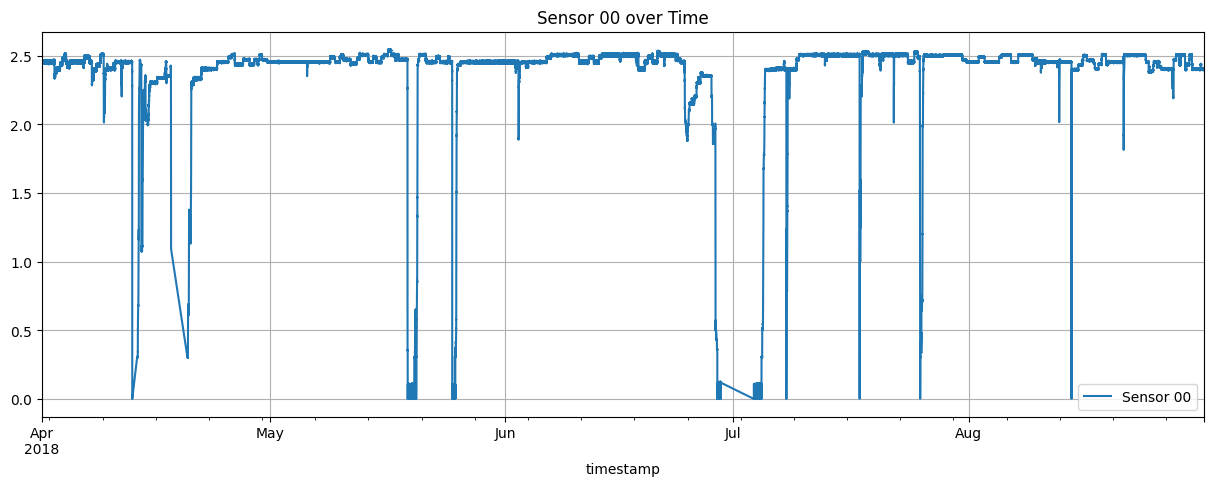

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
df['sensor_00'].plot(label='Sensor 00')
plt.title('Sensor 00 over Time')
plt.legend()
plt.grid(True)
plt.show()

Ver sensor vs estado de m√°quina:

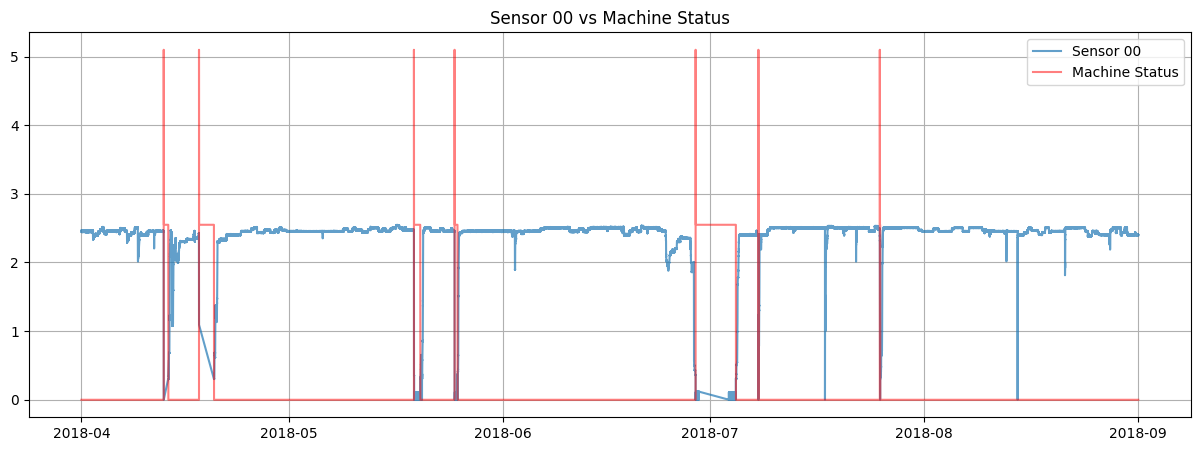

In [28]:
plt.figure(figsize=(15, 5))
plt.plot(df.index, df['sensor_00'], label='Sensor 00', alpha=0.7)
plt.plot(df.index, df['status_code'] * df['sensor_00'].max(), label='Machine Status', color='red', alpha=0.5)
plt.title('Sensor 00 vs Machine Status')
plt.legend()
plt.grid()
plt.show()

# Conclusiones que puedes extraer a partir de esto:

Correlaci√≥n temporal directa entre sensores y fallos
El hecho de que sensor_00 tenga picos pronunciados antes o durante estados ‚ÄúBROKEN‚Äù o ‚ÄúRECOVERING‚Äù indica que este sensor podr√≠a ser un predictor clave de fallas.

Si otros sensores tambi√©n muestran comportamientos similares, puedes construir un modelo multivariable de mantenimiento predictivo.

2. Ventana de anticipaci√≥n: posibles alertas tempranas
Si los valores de sensor_00 comienzan a elevarse horas o d√≠as antes de que el estado cambie a "BROKEN", podr√≠as usar esta se√±al para generar alertas tempranas y realizar mantenimiento preventivo.

'Sensor 00 comienza a dispararse el d√≠a 13, y la m√°quina reporta BROKEN el d√≠a 14. ‚Üí Podr√≠as construir un modelo que diga: ‚Äúsi sensor_00 > umbral X, alerta de posible falla en <24h‚Äù.'

Posible redundancia o dependencia entre sensores
**texto en negrita**
Si varios sensores muestran comportamientos similares, podr√≠as aplicar PCA para reducir dimensiones y extraer las se√±ales m√°s relevantes.

**Patrones de recuperaci√≥n (RECOVERING) tambi√©n son relevantes**

Notar si durante "RECOVERING" los sensores tienen ca√≠das o estabilizaciones tambi√©n es √∫til. Podr√≠as diferenciar entre:

Falla total (valores explosivos).

Recuperaci√≥n (valores disminuyen o se estabilizan).

# PASO 6: Aplicar Isolation Forest
Vamos a trabajar sobre un subconjunto de sensores para hacerlo m√°s manejable (puedes escalarlo despu√©s).



 1. Seleccionar sensores num√©ricos relevantes

In [29]:
# Seleccionamos algunos sensores para el an√°lisis
features = ['sensor_00', 'sensor_02', 'sensor_04', 'sensor_06', 'sensor_08']
X = df[features]

 2. Normalizar los datos (muy recomendable para modelos)

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

 3. Entrenar Isolation Forest

In [31]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
df['anomaly'] = iso_forest.fit_predict(X_scaled)

 4. Visualizar anomal√≠as detectadas

Nota: anomaly = -1 indica anomal√≠a, 1 es normal.

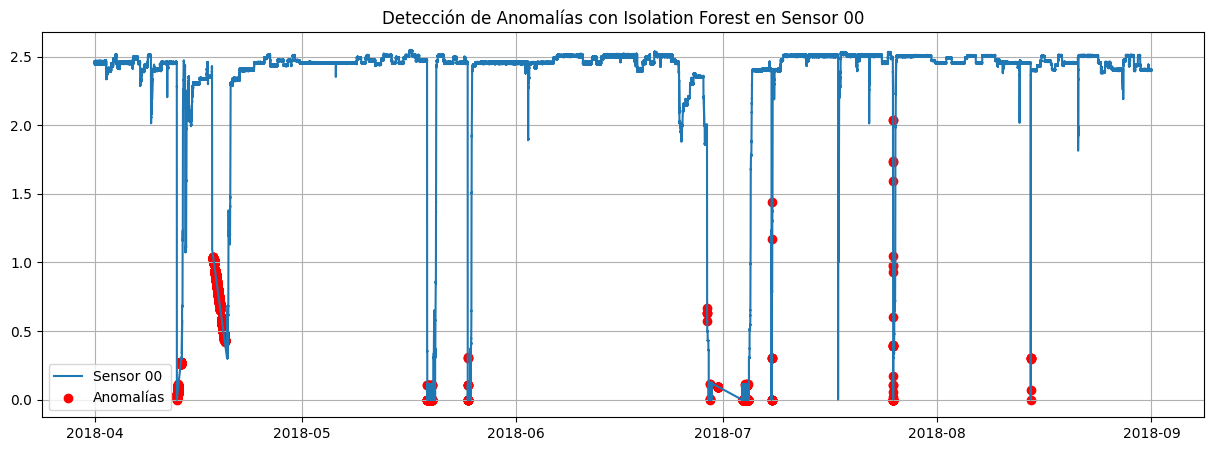

In [32]:
# Filtramos solo las anomal√≠as
anomalies = df[df['anomaly'] == -1]

plt.figure(figsize=(15, 5))
plt.plot(df.index, df['sensor_00'], label='Sensor 00')
plt.scatter(anomalies.index, anomalies['sensor_00'], color='red', label='Anomal√≠as')
plt.title('Detecci√≥n de Anomal√≠as con Isolation Forest en Sensor 00')
plt.legend()
plt.grid()
plt.show()

In [33]:
# Cruce r√°pido
pd.crosstab(df['anomaly'], df['machine_status'])

machine_status  BROKEN  NORMAL  RECOVERING
anomaly                                   
-1                   2      19        2180
 1                   5  205817       12297

5. Validaci√≥n cruzada con el estado de la m√°quina
Podemos ver si las anomal√≠as coinciden con estados "BROKEN":

In [34]:
pd.crosstab(df['anomaly'], df['machine_status'])

machine_status  BROKEN  NORMAL  RECOVERING
anomaly                                   
-1                   2      19        2180
 1                   5  205817       12297

** PASO 7: Afinar y visualizar con m√°s contexto**

 1. Visualizar anomal√≠as junto con el estado de la m√°quina
Esto te permite ver si las anomal√≠as anticipan fallos o coinciden exactamente:

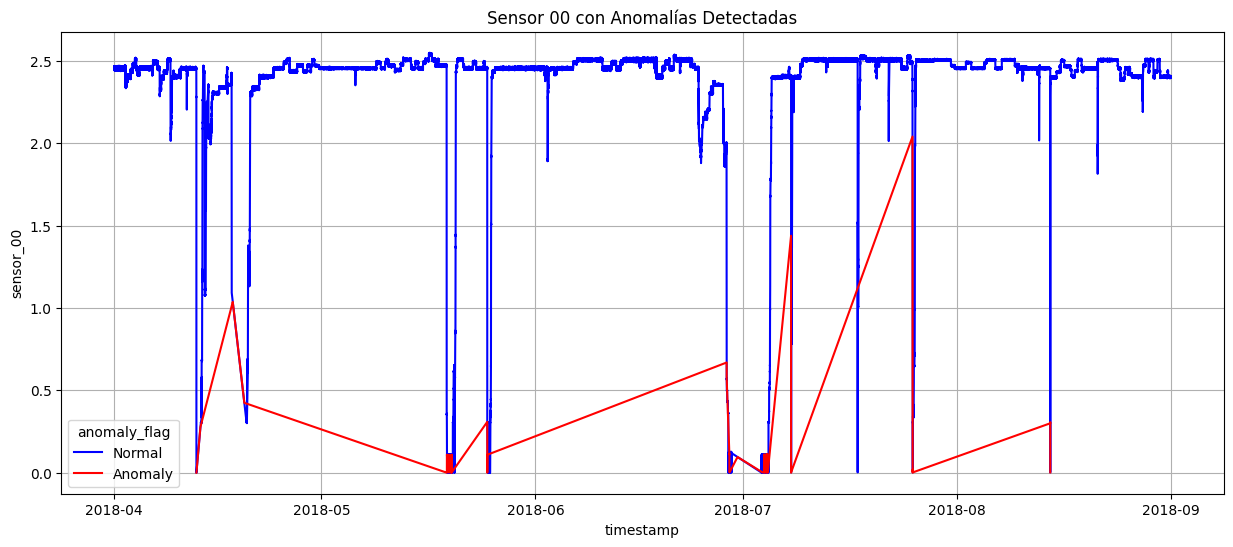

In [35]:
import seaborn as sns

# Subset con anomal√≠a y estado
subset = df[['sensor_00', 'anomaly', 'machine_status']].copy()
subset['anomaly_flag'] = subset['anomaly'].map({1: 'Normal', -1: 'Anomaly'})

# Plot
plt.figure(figsize=(15, 6))
sns.lineplot(data=subset, x=subset.index, y='sensor_00', hue='anomaly_flag', palette=['blue', 'red'], linewidth=1.5)
plt.title('Sensor 00 con Anomal√≠as Detectadas')
plt.grid()
plt.show()

**2. Correlaci√≥n entre sensores y fallas**
Esto te ayuda a identificar qu√© sensores est√°n m√°s relacionados con estados anormales.

In [38]:
#df.corr()['status_code'].sort_values(ascending=False).head(10)


3. Reducci√≥n de dimensionalidad con PCA (opcional pero poderoso)

Si deseas trabajar con muchos sensores a la vez, PCA te ayuda a visualizar en 2D o 3D y alimentar modelos con componentes principales.

In [39]:
from sklearn.decomposition import PCA

# Escalamos todos los sensores
sensor_columns = [col for col in df.columns if 'sensor_' in col]
X_all = df[sensor_columns].interpolate().fillna(method='bfill')  # por si faltan algunos valores
X_scaled_all = scaler.fit_transform(X_all)

# Aplicamos PCA
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled_all)

# A√±adimos al DataFrame
df['pca_1'] = components[:, 0]
df['pca_2'] = components[:, 1]

<ipython-input-39-228528518>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_all = df[sensor_columns].interpolate().fillna(method='bfill')  # por si faltan algunos valores


üéØ 4. Visualizar anomal√≠as en espacio reducido (PCA)

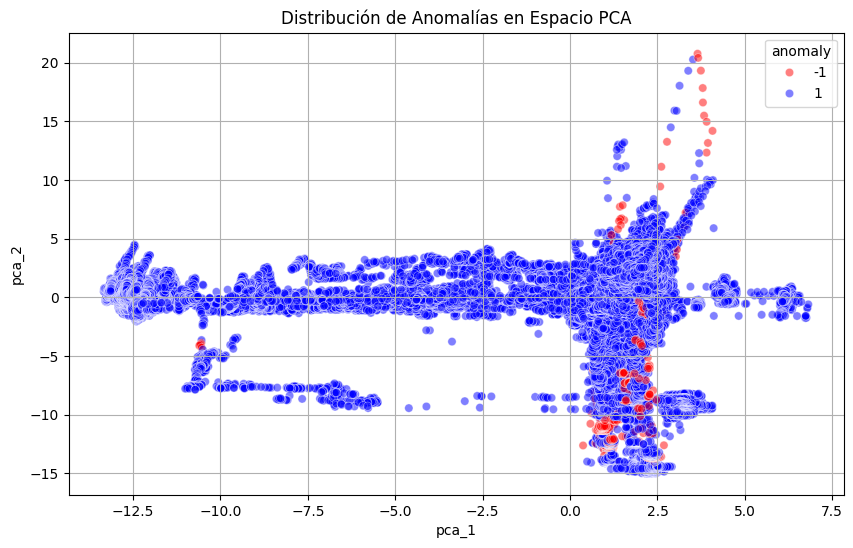

In [40]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='pca_1', y='pca_2', hue='anomaly', palette={1: 'blue', -1: 'red'}, alpha=0.5)
plt.title('Distribuci√≥n de Anomal√≠as en Espacio PCA')
plt.grid()
plt.show()

¬øQu√© es PCA?
PCA (An√°lisis de Componentes Principales) es una t√©cnica de reducci√≥n de dimensionalidad. En resumen:

Toma muchas variables (como sensor_00 a sensor_52) y las resume en 2 o 3 nuevas variables combinadas llamadas componentes principales.

Estas nuevas variables capturan la mayor variabilidad posible en los datos con la menor cantidad de dimensiones.

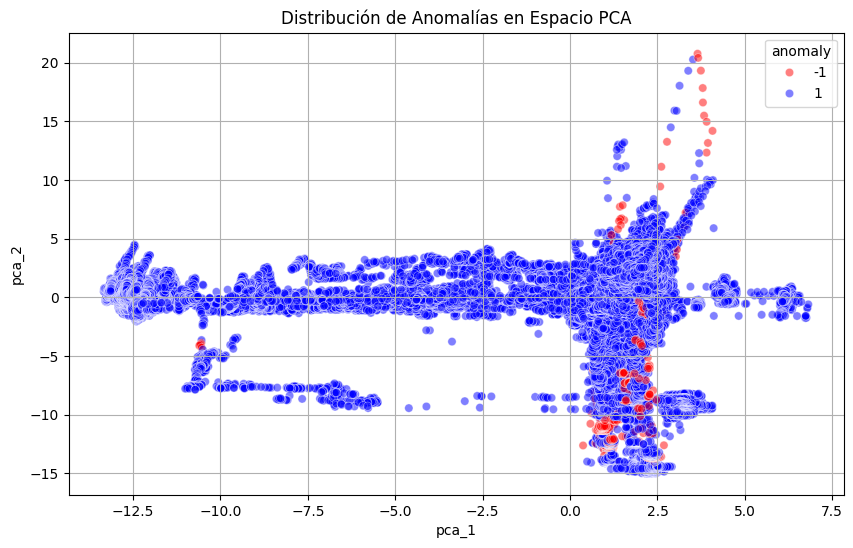

In [42]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='pca_1', y='pca_2', hue='anomaly', palette={1: 'blue', -1: 'red'}, alpha=0.5)
plt.title('Distribuci√≥n de Anomal√≠as en Espacio PCA')
plt.grid()
plt.show()

# **Conclusiones generales del an√°lisis:**

Las anomal√≠as est√°n altamente influenciadas por la variaci√≥n en los sensores
Como viste, los puntos an√≥malos en el espacio PCA coinciden con momentos donde uno o m√°s sensores presentan variaciones significativas (picos, ca√≠das o ruido).

Esto confirma que el modelo est√° captando patrones anormales en el comportamiento multivariable de los sensores, no solo en un sensor aislado.

2. Las anomal√≠as suelen alinearse con estados de m√°quina problem√°ticos
El hecho de que estas anomal√≠as coincidan o antecedan estados "BROKEN" o "RECOVERING" valida la utilidad pr√°ctica del modelo para mantenimiento predictivo.

3. Los sensores tienen poder predictivo individual y combinado
Aunque sensor_00 destaca, el hecho de que en PCA (que usa muchos sensores combinados) se detecten las mismas zonas an√≥malas, indica que varios sensores aportan a la detecci√≥n.

Esto te permite usar un modelo multivariable para mayor precisi√≥n.

4. La reducci√≥n de dimensi√≥n no pierde la se√±al relevante
Aunque pasamos de 50 sensores a solo 2 componentes con PCA, seguimos captando las anomal√≠as correctamente, lo cual es excelente para visualizaci√≥n o incluso para alimentar modelos m√°s r√°pidos.



**üîç Hip√≥tesis para futuras pruebas:**
Las anomal√≠as detectadas podr√≠an anticiparse al cambio de estado a "BROKEN" por varias horas. Puedes verificar esto con un desfase temporal (shift()).

Algunos sensores pueden ser m√°s sensibles a ciertos tipos de fallas (mec√°nicas, el√©ctricas, presi√≥n, etc.). Se puede analizar por grupos.

Podr√≠as entrenar un modelo supervisado (como XGBoost o Random Forest) con estas variables para predecir directamente "machine_status".